In [2]:
import pandas as pd
import seaborn as sns

In [3]:
insurance_data = pd.read_csv("insurance.csv")

In [4]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: xlabel='bmi', ylabel='charges'>

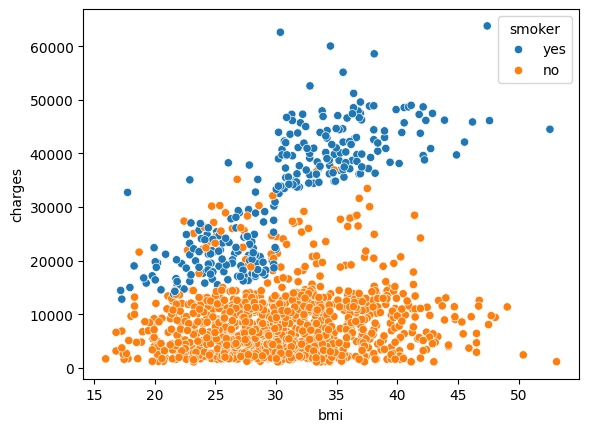

In [5]:
# visualise
sns.scatterplot(x=insurance_data["bmi"], y=insurance_data["charges"], hue=insurance_data["smoker"])

In [10]:
X = insurance_data.drop(columns = ["charges", "region"])
Y = insurance_data["charges"]

X["sex"] = X["sex"].map({"female": 1, "male": 0})

X["smoker"] = X["smoker"].map({"yes": 1, "no": 0})  #now we have all values in numrical formate

In [7]:
X.head()

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0


In [11]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [14]:
X_train.head()


,age,sex,bmi,children,smoker
560,46,1,19.95,2,0
1285,47,1,24.32,0,0
1142,52,1,24.86,0,0
969,39,1,34.32,5,0
486,54,1,21.47,3,0


In [15]:
#train Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
#predict values
Y_pred=model.predict(X_test)

In [19]:
Y_pred

array([ 8554.81711589,  6973.58746745, 36798.60416104,  9417.88282303,
       26871.68031081, 11097.38383938,   145.27608963, 16746.1683771 ,
         747.53414191, 11153.67590722, 28518.15016561,  9292.18345421,
        5460.51975119, 38510.48013003, 40359.30938604, 37223.40538064,
       15316.56711945, 36047.50032223,  9326.29049907, 31400.1559532 ,
        4269.64414373, 10464.66374097,  2719.9260555 ,  6579.53742551,
       11232.00255515, 12472.06793446, 14807.11281089,  6066.19283362,
        9535.69029723,  2377.6983797 ,  9475.05690885, 12963.23366722,
        4706.09057393,  3414.674504  ,  4815.64981654, 12484.17176954,
        2359.13614479,  9161.02061228, 33238.67621442, 32743.41702445,
        4274.58967205,  4229.5442107 , 14435.36485176, 11384.66898976,
        8925.70468583, 12480.09178788,  5154.45787816,  3554.10047649,
       35649.60942684,  9276.25523701, 15971.35991397,  2552.75200479,
       12162.99980138,  1062.65132285, 13551.43771934, 12103.65505529,
      

In [21]:
Y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [25]:
#Evaluate 
#R-Square and adjusted_r^2 values
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
print("r-squared:", r2)

n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))
print("adjusted r^2:", adjusted_r2)

r-squared: 0.7811302113434095
adjusted r^2: 0.7769533069797342


In [26]:
X_test.shape

(268, 5)

In [32]:
#One Hot Encoding
X = insurance_data.drop(columns = ["charges"])
Y = insurance_data["charges"]

X = pd.get_dummies(X, columns = ["region"], drop_first=True, dtype=int)
X["sex"] = X["sex"].map({"female": 1, "male": 0})
X["smoker"] = X["smoker"].map({"yes": 1, "no": 0})


In [33]:
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,1
1,18,0,33.770,1,0,0,1,0
2,28,0,33.000,3,0,0,1,0
3,33,0,22.705,0,0,1,0,0
4,32,0,28.880,0,0,1,0,0


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("r2 score: ",r2)

r2 score:  0.7835929767120724


In [35]:
#One Hot Encoding
X = insurance_data.drop(columns = ["charges"])
Y = insurance_data["charges"]

X = pd.get_dummies(X, columns = ["region"], drop_first=True, dtype=int)

X["sex"] = X["sex"].map({"female": 1, "male": 0})
X["smoker"] = X["smoker"].map({"yes": 1, "no": 0})

X["age_smoker"] = X["age"] * X["smoker"]
X["bmi_smoker"] = X["age"] * X["smoker"]

In [36]:
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,age_smoker,bmi_smoker
0,19,1,27.900,0,1,0,0,1,19,19
1,18,0,33.770,1,0,0,1,0,0,0
2,28,0,33.000,3,0,0,1,0,0,0
3,33,0,22.705,0,0,1,0,0,0,0
4,32,0,28.880,0,0,1,0,0,0,0


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("r2 score: ",r2)

r2 score:  0.7828842601196148


In [39]:
#underfit & overfit
#r2 training is low & r2 testing is also low - underfit
#r2 training >> r2 testing is low - overfit

Y_train_pred = model.predict(X_train)
r2_train = r2_score(Y_train, Y_train_pred)

print("training data r2:", r2_train)
print("test data r2:", r2)


training data r2: 0.7424386931704825
test data r2: 0.7828842601196148


In [40]:
insurance_data.shape


(1338, 7)